In [1]:
pip install tfx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

#Import Library

Karena saya kesulitan untuk membuat environment dan menyesuaikan dengan requirement yg ada di latihan dicoding saya menggunakan google colab untuk membuat file ipynb ini, dan dibutuhkan pip install tfx dahulu jika belum terinstall

Lakukan import library sesuai dengan kebutuhan

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import string

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from string import punctuation


from tfx.components import CsvExampleGen, StatisticsGen, SchemaGen, ExampleValidator, Transform, Trainer, Tuner
from tfx.proto import example_gen_pb2
from tfx.orchestration.experimental.interactive.interactive_context import InteractiveContext

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Set Variabel Pipeline

Sesuaikan name pipeline dengan nama username dicoding

In [3]:
PIPELINE_NAME = "mushab-pipeline"
SCHEMA_PIPELINE_NAME = "fakenews-tfdv-schema"

#Directory untuk menyimpan artifact yang akan dihasilkan
PIPELINE_ROOT = os.path.join('pipelines', PIPELINE_NAME)

# Path to a SQLite DB file to use as an MLMD storage.
METADATA_PATH = os.path.join('metadata', PIPELINE_NAME, 'metadata.db')

# Output directory where created models from the pipeline will be exported.
SERVING_MODEL_DIR = os.path.join('serving_model', PIPELINE_NAME)

# from absl import logging
# logging.set_verbosity(logging.INFO)

# Load Dataset

In [4]:
data_dir = 'data'
data_used = 'data_used'
file_name = '/content/data/fake_job_postings.csv'

In [6]:
df = pd.read_csv('/' + file_name)

In [7]:
df.head(5)

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [8]:
df.describe()

job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

Untuk lebih mudah melihatnya saya mencoba melakukan perbandingan antara fraudulent dengan yang non-fraudulent menggunakan plot

<ipython-input-9-f1f87f2ad3a4>:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


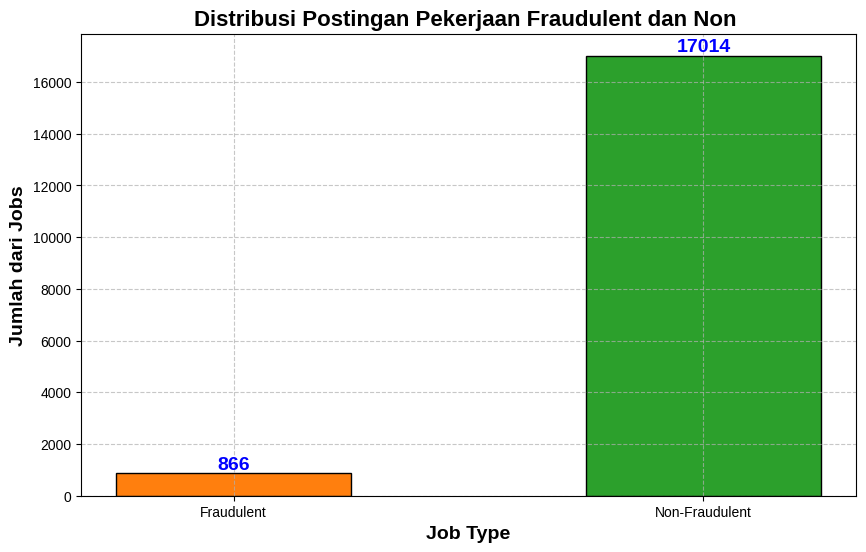

In [9]:
import matplotlib.pyplot as plt

# Menghitung jumlah lowongan pekerjaan palsu dan asli
fraudulent = df[df['fraudulent'] == 1]['fraudulent'].count()
non_fraudulent = df[df['fraudulent'] == 0]['fraudulent'].count()

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(10, 6))

# Membuat bar plot dengan warna dan lebar yang berbeda
ax.bar(['Fraudulent', 'Non-Fraudulent'], [fraudulent, non_fraudulent], color=['#ff7f0e', '#2ca02c'], width=0.5, edgecolor='black')

# Menambahkan anotasi dengan style yang berbeda
ax.text(0, fraudulent, fraudulent, ha='center', va='bottom', fontsize=14, fontweight='bold', color='blue')
ax.text(1, non_fraudulent, non_fraudulent, ha='center', va='bottom', fontsize=14, fontweight='bold', color='blue')

# Menambahkan grid
ax.grid(True, linestyle='--', alpha=0.7)

# Menambahkan judul dan label sumbu dengan style yang berbeda
ax.set_title("Distribusi Postingan Pekerjaan Fraudulent dan Non ", fontsize=16, fontweight='bold')
ax.set_xlabel("Job Type", fontsize=14, fontweight='bold')
ax.set_ylabel("Jumlah dari Jobs", fontsize=14, fontweight='bold')

# Mengatur tema plot
plt.style.use('seaborn-darkgrid')

# Menampilkan plot
plt.show()


# Preprocessing Data

Pada tahap preprocess dalam analisis data yang mencakup mengidentifikasi jumlah null dan juga melakukan drop terhadap kolom yg tidak saya perlukan

In [10]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [11]:
df = df.drop(columns=['job_id', 'salary_range', 'telecommuting', 'has_questions', 'has_company_logo'])

In [12]:
df.head(10)

title               location  \
0                           Marketing Intern       US, NY, New York   
1  Customer Service - Cloud Video Production         NZ, , Auckland   
2    Commissioning Machinery Assistant (CMA)          US, IA, Wever   
3          Account Executive - Washington DC     US, DC, Washington   
4                        Bill Review Manager     US, FL, Fort Worth   
5                           Accounting Clerk               US, MD,    
6                      Head of Content (m/f)         DE, BE, Berlin   
7           Lead Guest Service Specialist     US, CA, San Francisco   
8                                 HP BSM SME      US, FL, Pensacola   
9    Customer Service Associate - Part Time         US, AZ, Phoenix   

   department                                    company_profile  \
0   Marketing  We're Food52, and we've created a groundbreaki...   
1     Success  90 Seconds, the worlds Cloud Video Production ...   
2         NaN  Valor Services provides Workforce Solutions th...   
3       Sales  Our passion for improving quality of life thro...   
4         NaN  SpotSource Solutions LLC is a Global Human Cap...   
5         NaN                                                NaN   
6  ANDROIDPIT  Founded in 2009, the Fonpit AG rose with its i...   
7         NaN  Airenvy’s mission is to provide lucrative yet ...   
8         NaN  Solutions3 is a woman-owned small business who...   
9         NaN  Novitex Enterprise Solutions, formerly Pitney ...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   
5  Job OverviewApex is an environmental consultin...   
6  Your Responsibilities: Manage the English-spea...   
7  Who is Airenvy?Hey there! We are seasoned entr...   
8  Implementation/Configuration/Testing/Training ...   
9  The Customer Service Associate will be based i...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   
5                                                NaN   
6  Your Know-How:                                ...   
7  Experience with CRM software, live chat, and p...   
8  MUST BE A US CITIZEN.An active TS/SCI clearanc...   
9  Minimum Requirements:Minimum of 6 months custo...   

                                            benefits employment_type  \
0                                                NaN           Other   
1  What you will get from usThrough being part of...       Full-time   
2                                                NaN             NaN   
3  Our culture is anything but corporate—we have ...       Full-time   
4                              Full Benefits Offered       Full-time   
5                                                NaN             NaN   
6  Your Benefits: Being part of a fast-growing co...       Full-time   
7  Competitive Pay. You'll be able to eat steak e...             NaN   
8                                                NaN       Full-time   
9                                                NaN       Part-time   

  required_experience         required_education  \
0          Internship                        NaN   
1      Not Applicable                        NaN   
2                 NaN                        NaN   
3    Mid-Senior level          Bachelor's Degree   
4    Mid-Senior level          Bachelor's Degree   
5                 NaN                        NaN   
6    Mid-Senior level            Master's Degree   
7                 NaN                        NaN   
8           A

In [13]:
df.fillna(" ",inplace = True)

 Untuk memudahkan dalam analisis yang lebih komprehensif dan efisien terhadap data dalam konteks seperti teks, saya mencoba menggabungkan menjadi merge agar proses analisis menjadi lebih mudah

In [14]:
df['merge_text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function']

In [15]:
df.merge_text[0]

"Marketing Intern US, NY, New York Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food communi

Setelah penggabungan kolom df tadi, maka dapat dilakukan kolom yang lainnya

In [16]:
df = df.drop(columns=['title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function'])

Dan berikut tampilan kolom yang digunakan

In [17]:
df.head()

fraudulent                                         merge_text
0           0  Marketing Intern US, NY, New York Marketing We...
1           0  Customer Service - Cloud Video Production NZ, ...
2           0  Commissioning Machinery Assistant (CMA) US, IA...
3           0  Account Executive - Washington DC US, DC, Wash...
4           0  Bill Review Manager US, FL, Fort Worth   SpotS...

Selanjutnya meruapakan langkah yang penting perlu dilakukan yaitu melakukan filtering dengan code sebagai berikut

In [18]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [19]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [20]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

In [21]:
df.merge_text = df.merge_text.apply(lemmatize_words)

In [22]:
df.head()

fraudulent                                         merge_text
0           0  marketing intern us, ny, new york marketing we...
1           0  customer service cloud video production nz, au...
2           0  commissioning machinery assistant (cma) us, ia...
3           0  account executive washington dc us, dc, washin...
4           0  bill review manager us, fl, fort worth spotsou...

Setelah selesai lakukan penyimpanan dengan code berikut

In [23]:
os.makedirs(data_used, exist_ok=True)
df.to_csv(os.path.join(data_used, "fake_job_postings_used.csv"), index=False)

In [24]:
interactive_context = InteractiveContext(pipeline_root=PIPELINE_ROOT)

Selanjutnya saya coba ikuti modul yang di dicoding dan untuk menyesuaikan dengan tugas yang diberikan

# Example Gen

Pada kode selanjutnya, pipeline menggunakan ExampleGen untuk mengimpor data dan membagi data tersebut ke dalam dua bagian, yaitu train dan eval, dengan perbandingan 8:2.

In [25]:
output = example_gen_pb2.Output(
    split_config=example_gen_pb2.SplitConfig(splits=[
        example_gen_pb2.SplitConfig.Split(name="train", hash_buckets=8),
        example_gen_pb2.SplitConfig.Split(name="eval", hash_buckets=2),
    ])
)

example_gen = CsvExampleGen(input_base=data_used, output_config=output)

interactive_context.run(example_gen)

ExecutionResult(
    component_id: CsvExampleGen
    execution_id: 1
    outputs:
        examples: OutputChannel(artifact_type=Examples, producer_component_id=CsvExampleGen, output_key=examples, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

# StatisticGen

In [26]:
statistics_gen = StatisticsGen(
    examples=example_gen.outputs["examples"]
)
interactive_context.run(statistics_gen)
interactive_context.show(statistics_gen.outputs["statistics"])

Melalui StatisticsGen, kita dapat melihat beberapa informasi mengenai data seperti rata-rata, standar deviasi, min, max , dan lain lain

# SchemaGen

In [27]:
schema_gen = SchemaGen(
    statistics=statistics_gen.outputs["statistics"],
)
interactive_context.run(schema_gen)
interactive_context.show(schema_gen.outputs["schema"])

Type  Presence Valency Domain
Feature name                                
'fraudulent'    INT  required              -
'merge_text'  BYTES  required              -

SchemaGen mengevaluasi struktur dataset, termasuk tipe data dan informasi yang diperlukan untuk pengolahan selanjutnya.

# ExampleValidator


Setelah itu, menggunakan example validator, pipeline akan memeriksa apakah ada anomali atau data yang dapat memengaruhi kinerja model.

In [28]:
example_validator = ExampleValidator(
    statistics=statistics_gen.outputs["statistics"],
    schema=schema_gen.outputs["schema"],
)
interactive_context.run(example_validator)
interactive_context.show(example_validator.outputs["anomalies"])

# Transform

Kode ini mengatur modul transformasi data menggunakan TensorFlow Transform (tf.Transform), yang bertujuan untuk mempersiapkan data mentah untuk analisis atau pelatihan model. Dalam contoh ini, fitur teks diubah menjadi huruf kecil dan label dikonversi menjadi tipe data integer. Penggunaan `Transform` memungkinkan integrasi yang efisien dengan komponen-komponen lain dalam pipeline data, seperti `ExampleGen` dan `SchemaGen`.

In [29]:
TRANSFORM_MODULE_FILE = "newsjob_transform.py"

In [30]:
%%writefile {TRANSFORM_MODULE_FILE}
import tensorflow as tf

LABEL_KEY = "fraudulent"
FEATURE_KEY = "merge_text"

def transformed_name(key):
    return f"{key}_xf"

def preprocessing_fn(inputs):

    outputs = {}

    outputs[transformed_name(FEATURE_KEY)] = tf.strings.lower(inputs[FEATURE_KEY])

    outputs[transformed_name(LABEL_KEY)] = tf.cast(inputs[LABEL_KEY], tf.int64)

    return outputs


Writing newsjob_transform.py


In [31]:
transform = Transform(
    examples=example_gen.outputs["examples"],
    schema=schema_gen.outputs["schema"],
    module_file=os.path.abspath(TRANSFORM_MODULE_FILE)
)

interactive_context.run(transform)

ExecutionResult(
    component_id: Transform
    execution_id: 5
    outputs:
        transform_graph: OutputChannel(artifact_type=TransformGraph, producer_component_id=Transform, output_key=transform_graph, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        transformed_examples: OutputChannel(artifact_type=Examples, producer_component_id=Transform, output_key=transformed_examples, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        updated_analyzer_cache: OutputChannel(artifact_type=TransformCache, producer_component_id=Transform, output_key=updated_analyzer_cache, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        pre_transform_schema: OutputChannel(artifact_type=Schema, producer_component_id=Transform, output_key=pre_transform_schema, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        pre_transform_stats: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=Transform, output_key=pre_transform_stats, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        post_transform_schema: OutputChannel(artifact_type=Schema, producer_component_id=Transform, output_key=post_transform_schema, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        post_transform_stats: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=Transform, output_key=post_transform_stats, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        post_transform_anomalies: OutputChannel(artifact_type=ExampleAnomalies, producer_component_id=Transform, output_key=post_transform_anomalies, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

# Tuner Hyperparameter

Sebelumnya, kode berikut mengatur tuning model menggunakan keras_tuner untuk meningkatkan performa model yang diolah melalui tf.Transform. Proses tuning menggunakan BayesianOptimization untuk menentukan parameter terbaik seperti jumlah layer, dimensi embedding, dan unit LSTM. Data teks diubah menjadi token-token dan disesuaikan dengan model menggunakan TextVectorization sebelum dieksekusi dalam konteks interaktif untuk mendapatkan konfigurasi model optimal.

In [32]:
TUNER_MODULE_FILE = "newsjob_tuner.py"

In [33]:
%%writefile {TUNER_MODULE_FILE}

from typing import NamedTuple, Dict, Text, Any
import keras_tuner as kt
import tensorflow as tf
import tensorflow_transform as tft
from keras import layers
from tfx.components.trainer.fn_args_utils import FnArgs

LABEL_KEY = "fraudulent"
FEATURE_KEY = "merge_text"
NUM_EPOCHS = 10

TunerFnResult = NamedTuple("TunerFnResult", [
    ("tuner", kt.engine.base_tuner.BaseTuner),
    ("fit_kwargs", Dict[Text, Any]),
])

def transformed_name(key):
    return f"{key}_xf"

def gzip_reader_fn(filenames):
    return tf.data.TFRecordDataset(filenames, compression_type="GZIP")

def input_fn(file_pattern, tf_transform_output, num_epochs, batch_size=64):
    transform_feature_spec = tf_transform_output.transformed_feature_spec().copy()
    dataset = tf.data.experimental.make_batched_features_dataset(
        file_pattern=file_pattern,
        batch_size=batch_size,
        features=transform_feature_spec,
        reader=gzip_reader_fn,
        num_epochs=num_epochs,
        label_key=transformed_name(LABEL_KEY),
    )
    return dataset

def model_builder(hp, vectorizer_layer):
    num_hidden_layers = hp.Choice("num_hidden_layers", values=[1, 2])
    embed_dims = hp.Int("embed_dims", min_value=32, max_value=128, step=32)
    lstm_units = hp.Int("lstm_units", min_value=64, max_value=256, step=64)
    dense_units = hp.Int("dense_units", min_value=64, max_value=512, step=64)
    dropout_rate = hp.Float("dropout_rate", min_value=0.2, max_value=0.5, step=0.1)
    learning_rate = hp.Choice("learning_rate", values=[1e-3, 5e-4, 1e-4])

    inputs = tf.keras.Input(shape=(1,), name=transformed_name(FEATURE_KEY), dtype=tf.string)
    x = vectorizer_layer(inputs)
    x = layers.Embedding(input_dim=10000, output_dim=embed_dims)(x)
    x = layers.Bidirectional(layers.LSTM(lstm_units))(x)
    for _ in range(num_hidden_layers):
        x = layers.Dense(dense_units, activation=tf.nn.relu)(x)
        x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation=tf.nn.sigmoid)(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=["binary_accuracy"])
    return model

def tuner_fn(fn_args: FnArgs):
    tf_transform_output = tft.TFTransformOutput(fn_args.transform_graph_path)
    train_set = input_fn(fn_args.train_files[0], tf_transform_output, NUM_EPOCHS)
    eval_set = input_fn(fn_args.eval_files[0], tf_transform_output, NUM_EPOCHS)

    vectorizer_dataset = train_set.map(lambda f, l: f[transformed_name(FEATURE_KEY)])
    vectorizer_layer = layers.TextVectorization(max_tokens=10000, output_mode="int", output_sequence_length=500)
    vectorizer_layer.adapt(vectorizer_dataset)

    tuner = kt.BayesianOptimization(
        hypermodel=lambda hp: model_builder(hp, vectorizer_layer),
        objective=kt.Objective('binary_accuracy', direction='max'),
        max_trials=10,
        directory=fn_args.working_dir,
        project_name="kt_BayesianOptimization",
    )

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        mode="max",
        verbose=1,
        patience=5,
    )

    return TunerFnResult(
        tuner=tuner,
        fit_kwargs={
            "callbacks": [early_stopping_callback],
            "x": train_set,
            "validation_data": eval_set,
            "steps_per_epoch": fn_args.train_steps,
            "validation_steps": fn_args.eval_steps,
        },
    )


Writing newsjob_tuner.py


In [34]:
from tfx.components import Tuner
from tfx.proto import trainer_pb2

tuner = Tuner(
    module_file=os.path.abspath(TUNER_MODULE_FILE),
    examples=transform.outputs["transformed_examples"],
    transform_graph=transform.outputs["transform_graph"],
    schema=schema_gen.outputs["schema"],
    train_args=trainer_pb2.TrainArgs(splits=["train"], num_steps=20),
    eval_args=trainer_pb2.EvalArgs(splits=["eval"], num_steps=5),
)

interactive_context.run(tuner)

Trial 10 Complete [00h 00m 15s]
binary_accuracy: 0.9671875238418579

Best binary_accuracy So Far: 0.9671875238418579
Total elapsed time: 00h 02m 14s
Results summary
Results in pipelines/luthfihakimirawan-pipeline/.temp/6/kt_BayesianOptimization
Showing 10 best trials
Objective(name="binary_accuracy", direction="max")

Trial 09 summary
Hyperparameters:
num_hidden_layers: 2
embed_dims: 96
lstm_units: 64
dense_units: 192
dropout_rate: 0.30000000000000004
learning_rate: 0.0005
Score: 0.9671875238418579

Trial 01 summary
Hyperparameters:
num_hidden_layers: 1
embed_dims: 64
lstm_units: 128
dense_units: 64
dropout_rate: 0.2
learning_rate: 0.0005
Score: 0.95703125

Trial 08 summary
Hyperparameters:
num_hidden_layers: 2
embed_dims: 64
lstm_units: 192
dense_units: 192
dropout_rate: 0.4
learning_rate: 0.001
Score: 0.9515625238418579

Trial 06 summary
Hyperparameters:
num_hidden_layers: 1
embed_dims: 128
lstm_units: 64
dense_units: 128
dropout_rate: 0.2
learning_rate: 0.0005
Score: 0.9437500238418

ExecutionResult(
    component_id: Tuner
    execution_id: 6
    outputs:
        best_hyperparameters: OutputChannel(artifact_type=HyperParameters, producer_component_id=Tuner, output_key=best_hyperparameters, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        tuner_results: OutputChannel(artifact_type=TunerResults, producer_component_id=Tuner, output_key=tuner_results, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

# Trainer

Lalu untuk Trainernya menggunakan TensorFlow untuk melatih model dengan data yang telah diproses menggunakan tf.Transform, termasuk tuning parameter dengan keras_tuner sebelum pelatihan, serta pengawasan dan penyimpanan model terbaik untuk evaluasi dan penggunaan lebih lanjut.

In [35]:
TRAINER_MODULE_FILE = "newsjob_trainer.py"

In [36]:
%%writefile {TRAINER_MODULE_FILE}

import os
import tensorflow as tf
import tensorflow_transform as tft
from keras import layers
from tfx.components.trainer.fn_args_utils import FnArgs

LABEL_KEY = "fraudulent"
FEATURE_KEY = "merge_text"
NUM_EPOCHS = 5

# Callback untuk early stopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_binary_accuracy",
    mode="max",
    verbose=1,
    patience=10,
)

# Menambahkan suffix '_xf' ke nama fitur yang telah ditransformasi
def transformed_name(key):
    return key + "_xf"

# Membaca file TFRecord yang dikompresi dengan GZIP
def gzip_reader_fn(filenames):
    return tf.data.TFRecordDataset(filenames, compression_type='GZIP')

# Fungsi untuk membuat dataset input dari file TFRecord
def input_fn(file_pattern, tf_transform_output, num_epochs, batch_size=64) -> tf.data.Dataset:
    transform_feature_spec = tf_transform_output.transformed_feature_spec().copy()
    dataset = tf.data.experimental.make_batched_features_dataset(
        file_pattern=file_pattern,
        batch_size=batch_size,
        features=transform_feature_spec,
        reader=gzip_reader_fn,
        num_epochs=num_epochs,
        label_key=transformed_name(LABEL_KEY)
    )
    return dataset

# Fungsi untuk membuat model
def model_builder(vectorizer_layer, hyperparameters):
    inputs = tf.keras.Input(shape=(1,), name=transformed_name(FEATURE_KEY), dtype=tf.string)
    x = vectorizer_layer(inputs)
    x = layers.Embedding(input_dim=5000, output_dim=hyperparameters["embed_dims"])(x)
    x = layers.Bidirectional(layers.LSTM(hyperparameters["lstm_units"]))(x)
    for _ in range(hyperparameters["num_hidden_layers"]):
        x = layers.Dense(hyperparameters["dense_units"], activation=tf.nn.relu)(x)
        x = layers.Dropout(hyperparameters["dropout_rate"])(x)
    outputs = layers.Dense(1, activation=tf.nn.sigmoid)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hyperparameters["learning_rate"]),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy()],
    )
    model.summary()
    return model

# Fungsi untuk mengubah contoh tf ke format model yang akan disajikan
def _get_serve_tf_examples_fn(model, tf_transform_output):
    model.tft_layer = tf_transform_output.transform_features_layer()

    @tf.function
    def serve_tf_examples_fn(serialized_tf_examples):
        feature_spec = tf_transform_output.raw_feature_spec()
        feature_spec.pop(LABEL_KEY)
        parsed_features = tf.io.parse_example(serialized_tf_examples, feature_spec)
        transformed_features = model.tft_layer(parsed_features)
        return model(transformed_features)

    return serve_tf_examples_fn

# Fungsi utama untuk menjalankan pelatihan model
def run_fn(fn_args: FnArgs) -> None:
    hyperparameters = fn_args.hyperparameters["values"]
    log_dir = os.path.join(os.path.dirname(fn_args.serving_model_dir), "logs")

    # Callbacks untuk TensorBoard dan model checkpoint
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, update_freq="batch")
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        fn_args.serving_model_dir,
        monitor="val_binary_accuracy",
        mode="max",
        verbose=1,
        save_best_only=True,
    )
    callbacks = [tensorboard_callback, early_stopping_callback, model_checkpoint_callback]

    tf_transform_output = tft.TFTransformOutput(fn_args.transform_graph_path)
    train_set = input_fn(fn_args.train_files, tf_transform_output, NUM_EPOCHS)
    eval_set = input_fn(fn_args.eval_files, tf_transform_output, NUM_EPOCHS)

    # Membuat lapisan vektorisasi teks
    vectorizer_dataset = train_set.map(lambda f, l: f[transformed_name(FEATURE_KEY)])
    vectorizer_layer = layers.TextVectorization(max_tokens=5000, output_mode="int", output_sequence_length=500)
    vectorizer_layer.adapt(vectorizer_dataset)

    model = model_builder(vectorizer_layer, hyperparameters)

    # Melatih model
    model.fit(
        x=train_set,
        steps_per_epoch=fn_args.train_steps,
        validation_data=eval_set,
        validation_steps=fn_args.eval_steps,
        callbacks=callbacks,
        epochs=NUM_EPOCHS,
        verbose=1,
    )

    # Menyimpan model dengan signature untuk serving
    signatures = {
        "serving_default": _get_serve_tf_examples_fn(model, tf_transform_output).get_concrete_function(
            tf.TensorSpec(shape=[None], dtype=tf.string, name="examples")
        )
    }
    model.save(fn_args.serving_model_dir, save_format="tf", signatures=signatures)


Writing newsjob_trainer.py


In [37]:
from tfx.proto import trainer_pb2

trainer = Trainer(
    module_file=os.path.abspath(TRAINER_MODULE_FILE),
    examples=transform.outputs['transformed_examples'],
    transform_graph=transform.outputs['transform_graph'],
    schema=schema_gen.outputs['schema'],
    hyperparameters=tuner.outputs["best_hyperparameters"],
    train_args=trainer_pb2.TrainArgs(splits=['train']),
    eval_args=trainer_pb2.EvalArgs(splits=['eval'])
)

interactive_context.run(trainer)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 merge_text_xf (InputLayer)  [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 500)               0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 500, 96)           480000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               82432     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 192)               24768     
                                                                 
 dropout_2 (Dropout)         (None, 192)               0   

ExecutionResult(
    component_id: Trainer
    execution_id: 7
    outputs:
        model: OutputChannel(artifact_type=Model, producer_component_id=Trainer, output_key=model, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        model_run: OutputChannel(artifact_type=ModelRun, producer_component_id=Trainer, output_key=model_run, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

# Resolver

Resolver digunakan untuk memilih model terbaru yang telah melewati tahap validasi atau persetujuan dalam konteks pengembangan perangkat lunak. Dengan menggunakan strategi `LatestBlessedModelStrategy`, resolver ini mengintegrasikan channel `Model` dan `ModelBlessing` untuk menentukan model yang siap untuk dideploy.

In [38]:
from tfx.dsl.components.common.resolver import Resolver
from tfx.dsl.input_resolution.strategies.latest_blessed_model_strategy import LatestBlessedModelStrategy
from tfx.types import Channel
from tfx.types.standard_artifacts import Model, ModelBlessing

model_resolver = Resolver(
    strategy_class=LatestBlessedModelStrategy,
    model=Channel(type=Model),
    model_blessing=Channel(type=ModelBlessing)
).with_id("latest_blessed_model_resolver")


In [39]:
interactive_context.run(model_resolver)

ExecutionResult(
    component_id: latest_blessed_model_resolver
    execution_id: 8
    outputs:
        model: OutputChannel(artifact_type=Model, producer_component_id=latest_blessed_model_resolver, output_key=model, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        model_blessing: OutputChannel(artifact_type=ModelBlessing, producer_component_id=latest_blessed_model_resolver, output_key=model_blessing, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

# Evaluator

Evaluator menggunakan TFX untuk menganalisis performa model dengan metrik seperti AUC dan akurasi biner, membandingkan model baru dengan model dasar yang telah diverifikasi. Hasilnya divisualisasikan dengan TensorFlow Model Analysis untuk evaluasi metrik dan indikator kewajaran.

In [40]:
import tensorflow_model_analysis as tfma

eval_config = tfma.EvalConfig(
    model_specs=[tfma.ModelSpec(label_key='fraudulent')],
    slicing_specs=[tfma.SlicingSpec()],
    metrics_specs=[
        tfma.MetricsSpec(metrics=[
            tfma.MetricConfig(class_name='ExampleCount'),
            tfma.MetricConfig(class_name='AUC'),
            tfma.MetricConfig(class_name='FalsePositives'),
            tfma.MetricConfig(class_name='TruePositives'),
            tfma.MetricConfig(class_name='FalseNegatives'),
            tfma.MetricConfig(class_name='TrueNegatives'),
            tfma.MetricConfig(class_name='BinaryAccuracy',
                              threshold=tfma.MetricThreshold(
                                  value_threshold=tfma.GenericValueThreshold(
                                      lower_bound={'value': 0.5}),
                                  change_threshold=tfma.GenericChangeThreshold(
                                      direction=tfma.MetricDirection.HIGHER_IS_BETTER,
                                      absolute={'value': 0.0001})
                              )
            )
        ])
    ]
)

In [41]:
from tfx.components import Evaluator

model_analyzer = Evaluator(
    examples=example_gen.outputs["examples"],
    model=trainer.outputs["model"],
    baseline_model=model_resolver.outputs["model"],
    eval_config=eval_config
)


In [42]:
interactive_context.run(model_analyzer)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


ExecutionResult(
    component_id: Evaluator
    execution_id: 9
    outputs:
        evaluation: OutputChannel(artifact_type=ModelEvaluation, producer_component_id=Evaluator, output_key=evaluation, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        blessing: OutputChannel(artifact_type=ModelBlessing, producer_component_id=Evaluator, output_key=blessing, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

In [43]:
eval_result = model_analyzer.outputs['evaluation'].get()[0].uri
tfma_result = tfma.load_eval_result(eval_result)
tfma.view.render_slicing_metrics(tfma_result)
tfma.addons.fairness.view.widget_view.render_fairness_indicator(tfma_result)

# Pusher

Pusher digunakan dalam TensorFlow Extended (TFX) untuk mendorong model yang telah diberkati ke lingkungan produksi. Dalam contoh ini, Pusher mengambil output dari pelatihan model (`trainer.outputs["model"]`) dan hasil evaluasi (`model_analyzer.outputs["blessing"]`), lalu menyimpannya dalam direktori sistem berkas yang ditentukan untuk digunakan dalam layanan penyajian model.

In [44]:
from tfx.components import Pusher
from tfx.proto import pusher_pb2

pusher = Pusher(
    model=trainer.outputs["model"],
    model_blessing=model_analyzer.outputs["blessing"],
    push_destination=pusher_pb2.PushDestination(
        filesystem=pusher_pb2.PushDestination.Filesystem(
            base_directory='serving_model_dir/real-or-fake-jobs-detection-model'
        )
    )
)

interactive_context.run(pusher)

ExecutionResult(
    component_id: Pusher
    execution_id: 10
    outputs:
        pushed_model: OutputChannel(artifact_type=PushedModel, producer_component_id=Pusher, output_key=pushed_model, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

In [45]:
import shutil

shutil.make_archive('/content/pipelines', 'zip', '/content/pipelines')


'/content/pipelines.zip'

In [46]:
from google.colab import files

files.download('/content/pipelines.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
import shutil

shutil.make_archive('/content/serving_model_dir', 'zip', '/content/serving_model_dir')


'/content/serving_model_dir.zip'

In [48]:
from google.colab import files

files.download('/content/serving_model_dir.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
!pip freeze > requirements.txt


Langkah langkah terakhir dilakukan karna saya menggunakan google colab seperti yang saya sampaikan diawal sehingga saya menggunakan requirement yang telah berjalan di colab